# Import Modules

In [1]:
import random 
import numpy as np
import tensorflow as tf
import os
import zipfile
import pathlib
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Downloading data from Kaggle

In [2]:
# from google.colab import files
# files.upload()     

In [3]:
# !mkdir ~/.kaggle
# !mv ./kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets list

In [4]:
# ! kaggle datasets download -d sanikamal/horses-or-humans-dataset

# Reproducibility Function

In [5]:
! pip install tensorflow-determinism

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
def setup_seed(seed):
    random.seed(seed)  
    np.random.seed(seed) 
    tf.random.set_seed(seed)  # tf cpu fix seed
    os.environ['TF_DETERMINISTIC_OPS'] = '1'  # tf gpu fix seed, please `pip install tensorflow-determinism` first

# Get the data

In [7]:
# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("horses-or-humans-dataset.zip")
# zip_ref.extractall()
# zip_ref.close()

In [8]:
for dirpath, dirnames, filenames in os.walk("horse-or-human/horse-or-human"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'horse-or-human/horse-or-human'.
There are 2 directories and 0 images in 'horse-or-human/horse-or-human/train'.
There are 0 directories and 500 images in 'horse-or-human/horse-or-human/train/horses'.
There are 0 directories and 527 images in 'horse-or-human/horse-or-human/train/humans'.
There are 2 directories and 0 images in 'horse-or-human/horse-or-human/validation'.
There are 0 directories and 128 images in 'horse-or-human/horse-or-human/validation/horses'.
There are 0 directories and 128 images in 'horse-or-human/horse-or-human/validation/humans'.


In [9]:
# Create a function that can get the list of all class names in the datasets (can be either from train or validation dataset, but I will go with train datasets here)

def get_class_names(train_directory_path):
  data_dir = pathlib.Path(train_directory_path) # turning our training path into a Python Path
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
  return class_names

In [10]:
print(get_class_names("horse-or-human/horse-or-human/train"))

['horses' 'humans']


There are total two classes in the dataset, namely horses and humans. For training datasets, we have 500 images for horses and 527 images for humans, while for validation datasets, we have 128 images for horses and 128 images for humans

In [11]:
# Let's visualize one of the pictures in train or validation datasets

# Create a function to visualize a random image from the train or validation datasets
def view_random_image(target_directory, class_name):
   
  # Setup the target directory
  target_folder = target_directory + "/" + class_name
  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1) # will output a string inside a list

  # Read the image and plot the image
  image = mpimg.imread(target_folder + "/" + random_image[0]) # random_image[0] will extract the string inside the list
  plt.imshow(image)
  plt.axis("off")

  print(f"Image shape: {image.shape}") # show the shape of the image

  return image

Image shape: (300, 300, 4)


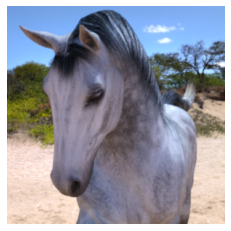

In [12]:
# View a random horse image from train dataset
horse_image = view_random_image(target_directory="horse-or-human/horse-or-human/train", 
                                class_name="horses")

Image shape: (300, 300, 4)


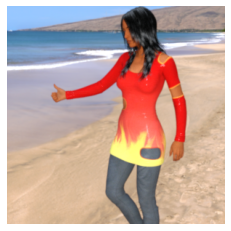

In [13]:
# View a random human image from train dataset
human_image = view_random_image(target_directory="horse-or-human/horse-or-human/train", 
                                class_name="humans")

In [14]:
# Let's view the horse image
horse_image

array([[[0.42745098, 0.60784316, 0.8627451 , 1.        ],
        [0.42745098, 0.6039216 , 0.8666667 , 1.        ],
        [0.42745098, 0.6039216 , 0.8666667 , 1.        ],
        ...,
        [0.5058824 , 0.6784314 , 0.92156863, 1.        ],
        [0.50980395, 0.6784314 , 0.91764706, 1.        ],
        [0.50980395, 0.6784314 , 0.91764706, 1.        ]],

       [[0.43137255, 0.60784316, 0.8666667 , 1.        ],
        [0.43137255, 0.60784316, 0.8666667 , 1.        ],
        [0.43137255, 0.60784316, 0.8666667 , 1.        ],
        ...,
        [0.50980395, 0.6784314 , 0.92156863, 1.        ],
        [0.5058824 , 0.6784314 , 0.92156863, 1.        ],
        [0.50980395, 0.6784314 , 0.91764706, 1.        ]],

       [[0.43137255, 0.60784316, 0.8666667 , 1.        ],
        [0.43529412, 0.60784316, 0.8666667 , 1.        ],
        [0.43137255, 0.60784316, 0.8666667 , 1.        ],
        ...,
        [0.50980395, 0.6784314 , 0.92156863, 1.        ],
        [0.5058824 , 0.678431

**Note:** Since the image is already normalized to have a value between zero and one, further division by 255 is no longer needed

# Build the model from scratch 

* **First Experiment** (10 epochs): From the results obtained in the first experiment, it looks like our model is **overfitting** as the validation loss is in increasing trend. As a result, we will try to use another method, which is data augmentation, to reduce the overfitting



In [ ]:
setup_seed(42)

train_datagen = ImageDataGenerator()
validation_datagen = ImageDataGenerator()

# Setup the train and validation directories
train_directory = "horse-or-human/horse-or-human/train/"
validation_directory = "horse-or-human/horse-or-human/validation/"

# Import data from the directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_directory,
                                               batch_size=32, 
                                               target_size=(300, 300),
                                               color_mode="rgba",
                                               class_mode="binary", # since we are dealing with binary classification
                                               seed=42) 

validation_data = validation_datagen.flow_from_directory(validation_directory,
                                               batch_size=32, 
                                               target_size=(300, 300), 
                                               color_mode="rgba",
                                               class_mode="binary", # since we are dealing with binary classification
                                               seed=42) 

# Create a CNN model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(300, 300, 4)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"), 
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"), 
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_1.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=10, # changed from 5 (first experiment epoch)
                        steps_per_epoch=len(train_data), 
                        validation_data=validation_data, 
                        validation_steps=len(validation_data))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/10
33/33 [==============================] - 21s 511ms/step - loss: 1.8124 - accuracy: 0.7030 - val_loss: 0.6400 - val_accuracy: 0.7422
Epoch 2/10
33/33 [==============================] - 13s 400ms/step - loss: 0.1897 - accuracy: 0.9328 - val_loss: 1.1436 - val_accuracy: 0.7891
Epoch 3/10
33/33 [==============================] - 13s 386ms/step - loss: 0.0545 - accuracy: 0.9844 - val_loss: 0.9086 - val_accuracy: 0.8359
Epoch 4/10
33/33 [==============================] - 13s 386ms/step - loss: 0.0273 - accuracy: 0.9912 - val_loss: 1.0880 - val_accuracy: 0.8516
Epoch 5/10
33/33 [==============================] - 13s 399ms/step - loss: 0.0115 - accuracy: 0.9990 - val_loss: 1.3307 - val_accuracy: 0.8398
Epoch 6/10
33/33 [==============================] - 13s 388ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 1.4717 - val_accuracy: 0.8359
Epoch 7/10
33/33 [==============================] - 15s 451

In [18]:
# Create a function to plot the training curves

def plot_training_curve(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

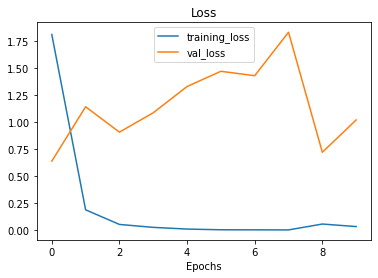

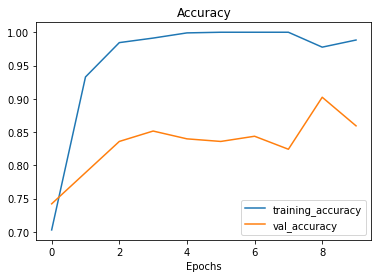

In [ ]:
# Plot the training curve for model_1
plot_training_curve(history_1)

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 10)      370       
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 144, 144, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 10)       0         
 2D)                                                    

# Build our model from scratch (using data augmentation)

As model_1 is overfitting, in this section, we will try to reduce the overfitting by using data augmentation

**First Experiment**: Looks like the model is overfitting. We will try to another method, which utilizes both data augmentation and Keras Dropout layers to reduce overfitting 

In [16]:
setup_seed(42)

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=1, # shear the image
                                             zoom_range=1, # zoom into the image
                                             width_shift_range=1, # shift the image width ways
                                             height_shift_range=1, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis
                                             
validation_datagen = ImageDataGenerator()

# Setup the train and validation directories
train_directory = "horse-or-human/horse-or-human/train/"
validation_directory = "horse-or-human/horse-or-human/validation/"

# Import data from the directories and turn it into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(train_directory,
                                                                   batch_size=32, 
                                                                   target_size=(300, 300),
                                                                   color_mode="rgba", 
                                                                   class_mode="binary", # since we are dealing with binary classification
                                                                   shuffle=True,
                                                                   seed=42)
                                                  

validation_data = validation_datagen.flow_from_directory(validation_directory,
                                               batch_size=32, 
                                               target_size=(300, 300),
                                               color_mode="rgba", 
                                               class_mode="binary", # since we are dealing with binary classification
                                               seed=42) 

# Create a CNN model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(300, 300, 4)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"), 
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"), 
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data_augmented, 
                        epochs=10, 
                        steps_per_epoch=len(train_data_augmented), 
                        validation_data=validation_data, 
                        validation_steps=len(validation_data))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/10
33/33 [==============================] - 39s 1s/step - loss: 1.6927 - accuracy: 0.5725 - val_loss: 0.3839 - val_accuracy: 0.8789
Epoch 2/10
33/33 [==============================] - 35s 1s/step - loss: 0.5460 - accuracy: 0.7264 - val_loss: 0.4084 - val_accuracy: 0.8047
Epoch 3/10
33/33 [==============================] - 36s 1s/step - loss: 0.4805 - accuracy: 0.7722 - val_loss: 0.5180 - val_accuracy: 0.7539
Epoch 4/10
33/33 [==============================] - 35s 1s/step - loss: 0.4464 - accuracy: 0.7858 - val_loss: 1.1561 - val_accuracy: 0.6328
Epoch 5/10
33/33 [==============================] - 36s 1s/step - loss: 0.4266 - accuracy: 0.7955 - val_loss: 0.3362 - val_accuracy: 0.8672
Epoch 6/10
33/33 [==============================] - 35s 1s/step - loss: 0.3817 - accuracy: 0.8238 - val_loss: 1.2212 - val_accuracy: 0.6172
Epoch 7/10
33/33 [==============================] - 34s 1s/step - loss: 0.336

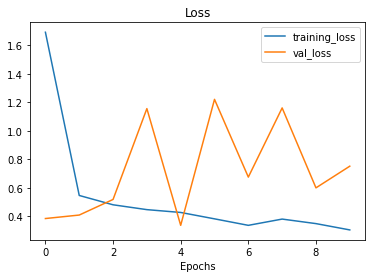

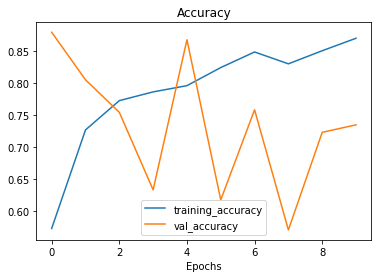

In [19]:
# Plot the training curve for model_2
plot_training_curve(history_2)

In [20]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 298, 298, 10)      370       
                                                                 
 conv2d_7 (Conv2D)           (None, 296, 296, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 148, 148, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 146, 146, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 144, 144, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 72, 72, 10)       0         
 2D)                                                  

# Build our model from scratch (adding Dropout layer + data augmentation)

**First Experiment** (10 epochs, 0.2 dropout rate): The model is still overfitting, as the validation loss is in increasing trend in the last 3 epochs. Let's try to use larger dropout rate (0.3 dropout rate)

**Second Experiment** (10 epochs, 0.3 dropout rate): Looks like the model is still overfitting. Another method that can be used to reduce overfitting is to use **transfer learning**

In [24]:
setup_seed(42)

# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=1, # shear the image
                                             zoom_range=1, # zoom into the image
                                             width_shift_range=1, # shift the image width ways
                                             height_shift_range=1, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis
                                             
validation_datagen = ImageDataGenerator()

# Setup the train and validation directories
train_directory = "horse-or-human/horse-or-human/train/"
validation_directory = "horse-or-human/horse-or-human/validation/"

# Import data from the directories and turn it into batches
train_data_augmented = train_datagen_augmented.flow_from_directory(train_directory,
                                                                   batch_size=32, 
                                                                   target_size=(300, 300), 
                                                                   color_mode="rgba",
                                                                   class_mode="binary", # since we are dealing with binary classification
                                                                   shuffle=True,
                                                                   seed=42)
                                                  

validation_data = validation_datagen.flow_from_directory(validation_directory,
                                               batch_size=32, 
                                               target_size=(300, 300),  
                                               color_mode="rgba",
                                               class_mode="binary", # since we are dealing with binary classification
                                               seed=42) 

# Create a CNN model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(300, 300, 4)),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"), 
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"), 
  tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy", 
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data_augmented, 
                        epochs=10, 
                        steps_per_epoch=len(train_data_augmented), 
                        validation_data=validation_data, 
                        validation_steps=len(validation_data))

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.
Epoch 1/10
33/33 [==============================] - 35s 1s/step - loss: 7.1255 - accuracy: 0.5054 - val_loss: 0.7168 - val_accuracy: 0.5078
Epoch 2/10
33/33 [==============================] - 35s 1s/step - loss: 0.7416 - accuracy: 0.4479 - val_loss: 0.6839 - val_accuracy: 0.5859
Epoch 3/10
33/33 [==============================] - 35s 1s/step - loss: 0.6842 - accuracy: 0.5540 - val_loss: 0.6756 - val_accuracy: 0.6016
Epoch 4/10
33/33 [==============================] - 35s 1s/step - loss: 0.6704 - accuracy: 0.5852 - val_loss: 0.6749 - val_accuracy: 0.5938
Epoch 5/10
33/33 [==============================] - 35s 1s/step - loss: 0.6789 - accuracy: 0.5511 - val_loss: 0.6674 - val_accuracy: 0.5898
Epoch 6/10
33/33 [==============================] - 36s 1s/step - loss: 0.6593 - accuracy: 0.5940 - val_loss: 0.6482 - val_accuracy: 0.6055
Epoch 7/10
33/33 [==============================] - 35s 1s/step - loss: 0.624

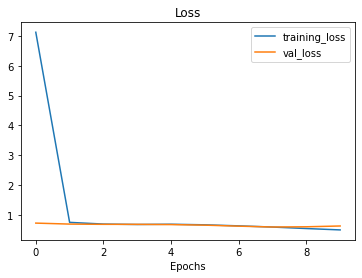

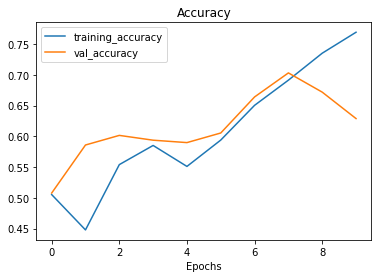

In [25]:
# Plot the training curve for model_3
plot_training_curve(history_3)

In [26]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 298, 298, 10)      370       
                                                                 
 conv2d_19 (Conv2D)          (None, 296, 296, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 148, 148, 10)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 148, 148, 10)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 146, 146, 10)      910       
                                                                 
 conv2d_21 (Conv2D)          (None, 144, 144, 10)      910       
                                                      